In [2]:
import os
import pandas as pd
import warnings
import numpy as np
os.chdir("../")
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [196]:
vol_schemes = ['term_vol_12', 'term_vol_3', 'flat_12m', 'flat_3m']

In [197]:
result_dict = {}

In [198]:
option_exp = '12m'

In [199]:
dates = os.listdir(f"./back_test_result/{option_exp}/")

In [200]:
ind_stock_result = {}
for vol_scheme in vol_schemes:
    ind_stock_result[vol_scheme] = pd.DataFrame()
    for date in dates:
        _df = pd.read_csv(f"./back_test_result/{option_exp}/{date}/{vol_scheme}/result.csv", parse_dates=True, index_col=0)
        _df.columns = [date]
        if ind_stock_result[vol_scheme].empty:
            ind_stock_result[vol_scheme] = _df
        else:
            ind_stock_result[vol_scheme] = pd.merge(ind_stock_result[vol_scheme], _df, left_index=True, right_index=True)
    ind_stock_result[vol_scheme] = ind_stock_result[vol_scheme].T
    ind_stock_result[vol_scheme].index = pd.to_datetime(ind_stock_result[vol_scheme].index)
    # print(len(frame.columns))

In [201]:
stat_result = {}
for key, value in ind_stock_result.items():
    value_ = value.fillna(0)
    stat_result[key] = {}
    stat_result[key]['pnl'] = np.mean(value_.values)
    stat_result[key]['std'] = np.std(value_.values)

In [202]:
stat_result

{'term_vol_12': {'pnl': 0.011075330354054301, 'std': 0.21915322508563606},
 'term_vol_3': {'pnl': 0.010742541535467307, 'std': 0.21942906565778866},
 'flat_12m': {'pnl': 0.00974615703029707, 'std': 0.21926753155387493},
 'flat_3m': {'pnl': 0.008560936561842031, 'std': 0.22363905998295935}}

In [203]:
stat_frame = pd.DataFrame(stat_result)
stat_frame

,term_vol_12,term_vol_3,flat_12m,flat_3m
pnl,0.011075,0.010743,0.009746,0.008561
std,0.219153,0.219429,0.219268,0.223639


In [204]:
perf_frame = pd.DataFrame()
for vol_scheme in vol_schemes:
    result_dict[vol_scheme] = {}
    frame = pd.DataFrame()
    for date in dates:
        _df = pd.read_csv(f"./back_test_result/{option_exp}/{date}/{vol_scheme}/result.csv", parse_dates=True, index_col=0)
        _df.columns = [date]
        if frame.empty:
            frame = _df
        else:
            frame = pd.merge(frame, _df, left_index=True, right_index=True)
    frame = frame.T
    frame.index = pd.to_datetime(frame.index)
    # print(len(frame.columns))
    perf_frame[vol_scheme] = frame.mean(axis=1)

In [205]:
perf_frame

,term_vol_12,term_vol_3,flat_12m,flat_3m
2012-04-05,0.010432,0.010369,0.011208,0.026266
2012-05-02,0.003323,0.003664,0.003881,-0.003301
2012-06-01,-0.007393,-0.006841,-0.006559,-0.011963
2012-07-02,0.008823,0.008469,0.009201,-0.001333
2012-08-01,0.000303,0.000581,0.001214,-0.013170
...,...,...,...,...
2020-12-01,0.001794,0.001042,0.002962,-0.023995
2021-01-04,0.022612,0.022662,0.024104,-0.005558
2021-02-01,0.056295,0.056587,0.058176,0.040617
2021-03-01,0.037584,0.037094,0.039073,0.035662


In [206]:
vol_frame = pd.read_pickle("./000905_vol_explore/vol_frame.pickle")

In [207]:
vol_frame = vol_frame[vol_frame.index >= perf_frame.index[0]]

In [208]:
perf_frame

,term_vol_12,term_vol_3,flat_12m,flat_3m
2012-04-05,0.010432,0.010369,0.011208,0.026266
2012-05-02,0.003323,0.003664,0.003881,-0.003301
2012-06-01,-0.007393,-0.006841,-0.006559,-0.011963
2012-07-02,0.008823,0.008469,0.009201,-0.001333
2012-08-01,0.000303,0.000581,0.001214,-0.013170
...,...,...,...,...
2020-12-01,0.001794,0.001042,0.002962,-0.023995
2021-01-04,0.022612,0.022662,0.024104,-0.005558
2021-02-01,0.056295,0.056587,0.058176,0.040617
2021-03-01,0.037584,0.037094,0.039073,0.035662


In [209]:
data_obj = {'x':vol_frame.index,
            'close': vol_frame['close'].values, 'scatter': perf_frame.index
            }
for vol_scheme in vol_schemes:
    data_obj[vol_scheme] = perf_frame[vol_scheme].values
for i in range(1, 13):
    data_obj[f"{i}m"] = vol_frame[f"{i}m"].values
#plt.savefig("./plots/1y-Vol.png")

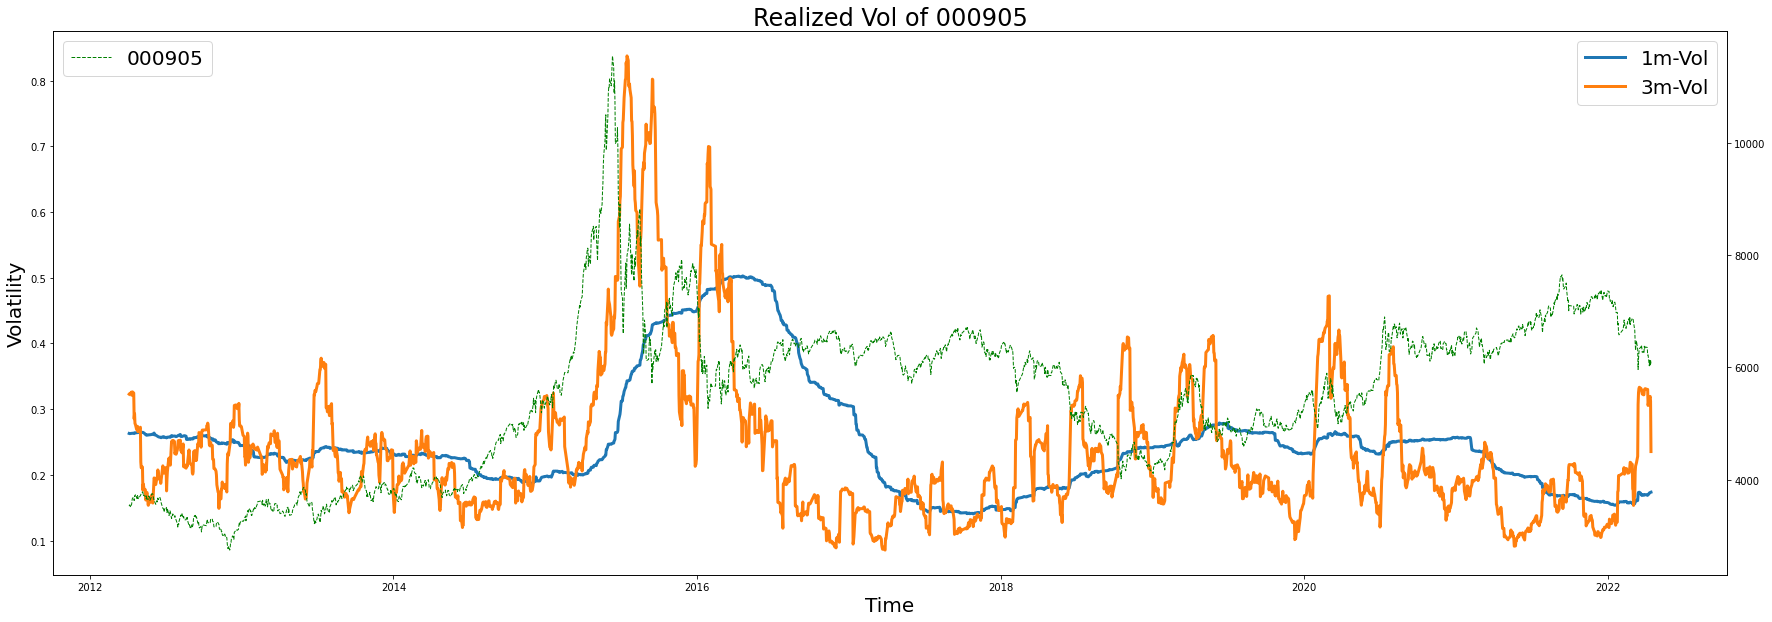

In [210]:
fig,ax = plt.subplots(figsize=(30, 10))
ax.plot('x','12m','-', data=data_obj, linewidth=3, label="1m-Vol")
ax.plot('x','1m','-', data=data_obj, linewidth=3, label="3m-Vol")
# ax.plot('x','12m','-', data=data_obj, linewidth=3, label="12m-Vol")
ax.legend(prop={'size': 20})
plt.xlabel("Time", fontdict={'size': 20})
plt.ylabel("Volatility", fontdict={'size': 20})
plt.title("Realized Vol of 000905", fontdict={'size': 24})
ax2 = plt.twinx(ax)
ax2.plot('x', 'close', '--', color='green', data=data_obj, linewidth=1, label='000905')
ax2.legend(loc='upper left', prop={'size': 20})
# plt.legend(prop={'size':25})
    #set(ylabel='Volatility',xlabel='Time',title='Historical Volatility of 000905')
plt.savefig("./plots/vol_3m_1m.png")

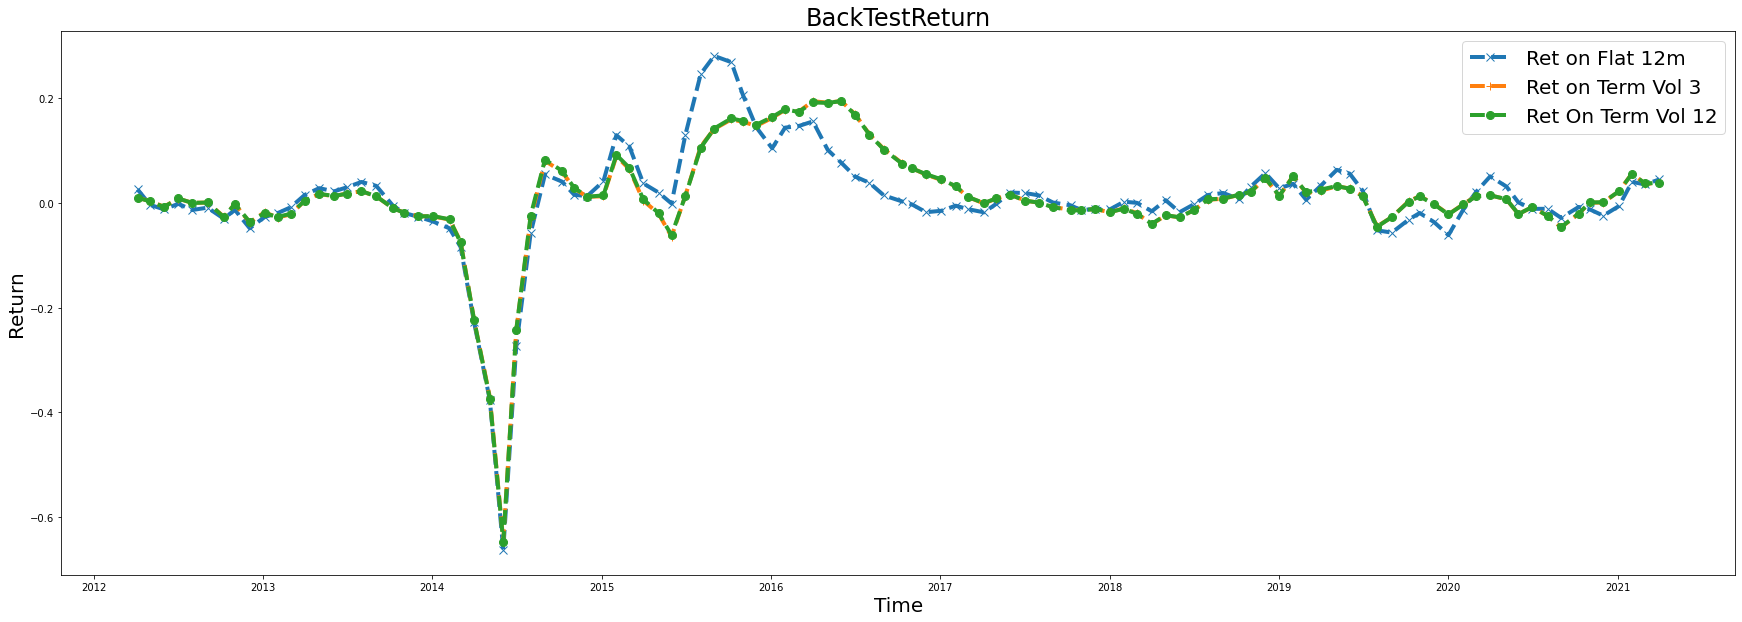

In [211]:
fig3,ax = plt.subplots(figsize=(30, 10))
ax.plot('scatter','flat_3m','--', marker='x', markersize=8, data=data_obj, linewidth=4, label="Ret on Flat 12m")
ax.plot('scatter','term_vol_3','--', marker='+', markersize=8, data=data_obj, linewidth=4, label="Ret on Term Vol 3")
ax.plot('scatter', 'term_vol_12', '--', marker="o", markersize=8, data=data_obj, linewidth=4, label="Ret On Term Vol 12")

ax.legend(prop={'size': 20})
plt.ylabel("Return", fontdict={'size': 20})
plt.xlabel("Time", fontdict={'size': 20})
#ax2 = plt.twinx(ax)
#ax2.plot('x','close','--', color='green', data=data_obj, linewidth=1.5, label="000905")
#ax2.plot('x','12m','--', data=data_obj, linewidth=1, label="12m-Realized Vol")
#ax2.legend(loc='upper left', prop={'size': 20})
plt.title("BackTestReturn", fontdict={'size': 24})
    #set(ylabel='Volatility',xlabel='Time',title='Historical Volatility of 000905')
plt.savefig("./plots/1m_option_vol_12m_3m.png")

In [182]:
from datetime import datetime

In [183]:
segmentation = {
    datetime(2012, 1, 1): datetime(2014, 1, 1),
    datetime(2014, 1, 1): datetime(2016, 1, 1),
    datetime(2016, 1, 1): datetime(2018, 1, 1),
    datetime(2018, 1, 1): datetime(2020, 1, 1),
    datetime(2020, 1, 1): datetime(2022, 12, 31)
}

In [184]:
segmentation_dict = {}
for start, end in segmentation.items():
    segmentation_dict[start] = {}
    for key, value in ind_stock_result.items():
        sub_frame = value[(value.index >= start) & (value.index < end)]
        segmentation_dict[start][key] = {}
        segmentation_dict[start][key]['pnl'] = np.mean(sub_frame.fillna(0).values)
        segmentation_dict[start][key]['std'] = np.std(sub_frame.fillna(0).values)

In [185]:
segmentation_dict

{datetime.datetime(2012, 1, 1, 0, 0): {'term_vol_12': {'pnl': -0.0036977854154546805,
   'std': 0.14353694277986734},
  'term_vol_3': {'pnl': -0.0036797870596552984, 'std': 0.14379353689657584},
  'flat_12m': {'pnl': -0.0030445966992884727, 'std': 0.1432170369829851}},
 datetime.datetime(2014, 1, 1, 0, 0): {'term_vol_12': {'pnl': -0.025415442773524505,
   'std': 0.35273979557764673},
  'term_vol_3': {'pnl': -0.026939612393238745, 'std': 0.35329291787258604},
  'flat_12m': {'pnl': -0.033058436266479856, 'std': 0.3529298876875093}},
 datetime.datetime(2016, 1, 1, 0, 0): {'term_vol_12': {'pnl': 0.0736686711483653,
   'std': 0.11359087709476193},
  'term_vol_3': {'pnl': 0.07387295687978211, 'std': 0.11363503693317022},
  'flat_12m': {'pnl': 0.073506449679118, 'std': 0.11425724752299159}},
 datetime.datetime(2018, 1, 1, 0, 0): {'term_vol_12': {'pnl': 0.0031743082658965173,
   'std': 0.13222135479259975},
  'term_vol_3': {'pnl': 0.0030542320882934785, 'std': 0.13206836421489643},
  'flat_12m

In [186]:
segmentation_frame = {}

In [187]:
for key, value in segmentation_dict.items():
    segmentation_frame[key] = pd.DataFrame(value)

In [188]:
dates = list(segmentation_dict.keys())

In [193]:
segmentation_frame[dates[4]]

,term_vol_12,term_vol_3,flat_12m
pnl,0.003163,0.003032,0.003755
std,0.244167,0.244115,0.243270


In [95]:
dates

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2014, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0)]